# PCA

what is PCA?

PCA stands for principal component analysis, it is an unsupervised algorithm that creates linear combinations from the original features.

the pricipal aim of PCA is to keep as much variance as possible from the original data in a lower dimensional space.

To showcase the ability of PCA algorithm we rae going to use the **HTRU2** dataset it is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (pulsar or non-pulsar class)

# Let's get the data

In [20]:
import urllib.request # to get the data from the web page
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip', './DATA_HTRU2.zip')

('./DATA_HTRU2.zip', <http.client.HTTPMessage at 0x23940c85f00>)

In [3]:
with zipfile.ZipFile('./DATA_HTRU2.zip', 'r') as zip_ref:
    zip_ref.extractall('./DATA')

In [4]:
# Load data into a pandas dataframe
data = pd.read_csv('data/HTRU_2.csv', names=['mean_ip', 'sd_ip', 'ec_ip', 
                                        'sw_ip', 'mean_dm', 'sd_dm', 
                                        'ec_dm', 'sw_dm', 'pulsar'])

# Take a look at the data
data.head()

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
#check for missing values
data.isnull().sum()

mean_ip    0
sd_ip      0
ec_ip      0
sw_ip      0
mean_dm    0
sd_dm      0
ec_dm      0
sw_dm      0
pulsar     0
dtype: int64

In [6]:
#check for outliers
data.describe()

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm,pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mean_ip  17898 non-null  float64
 1   sd_ip    17898 non-null  float64
 2   ec_ip    17898 non-null  float64
 3   sw_ip    17898 non-null  float64
 4   mean_dm  17898 non-null  float64
 5   sd_dm    17898 non-null  float64
 6   ec_dm    17898 non-null  float64
 7   sw_dm    17898 non-null  float64
 8   pulsar   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
X=data.drop('pulsar',axis=1)
y=data['pulsar']

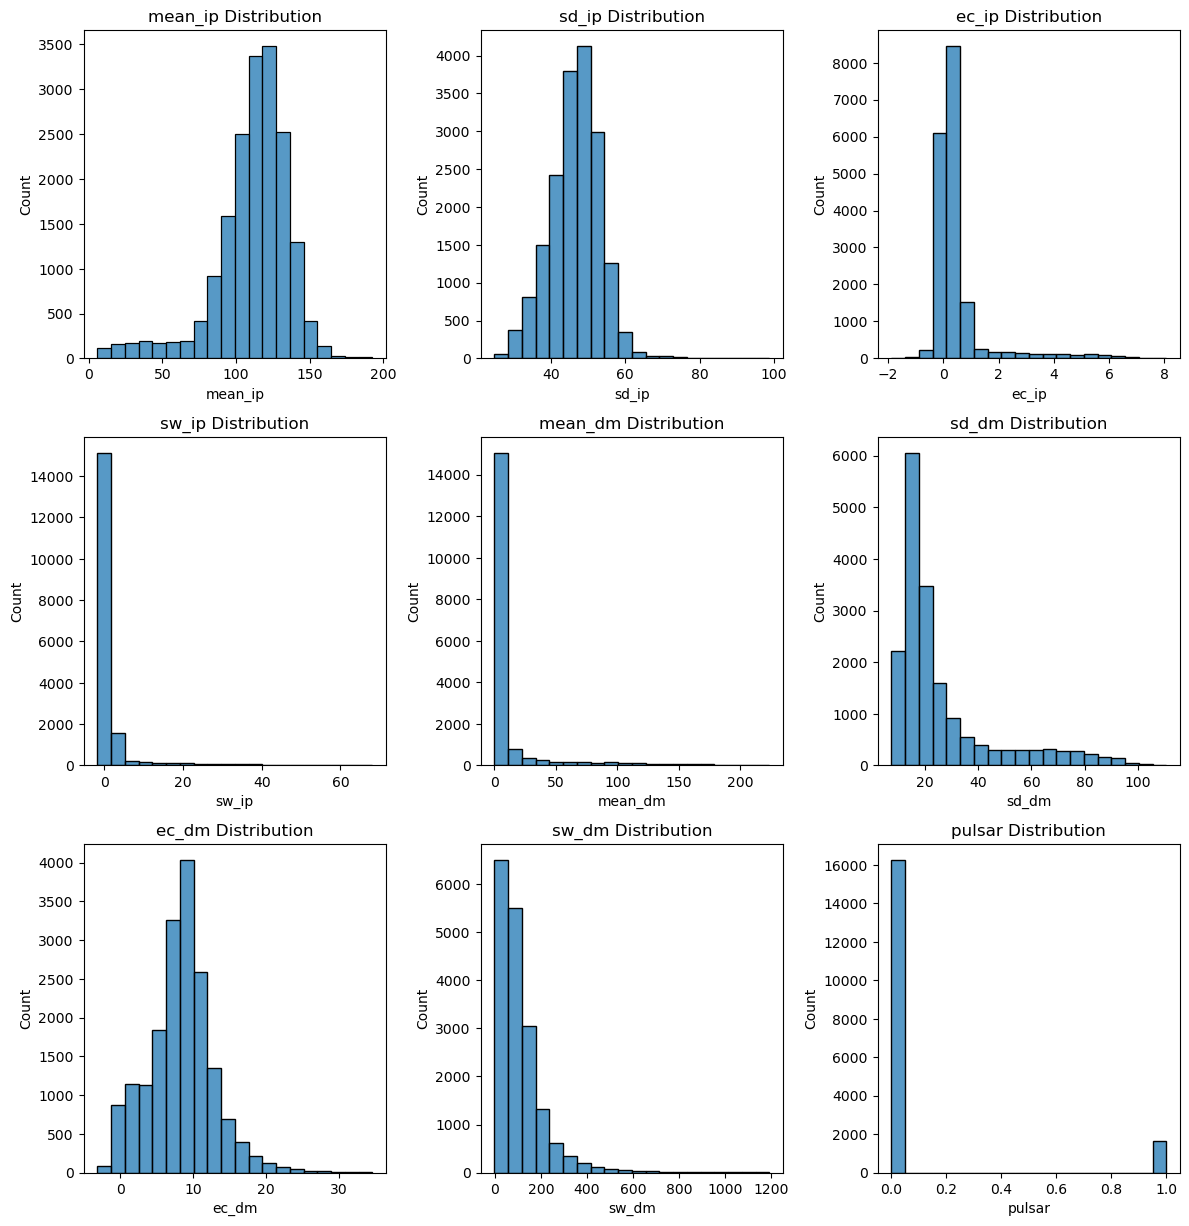

In [9]:
plt.figure(figsize=(12,16))
for i, j in enumerate(data.describe().columns):
    plt.subplot(4,3, i+1)
    sns.histplot(x=data[j],bins=20)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

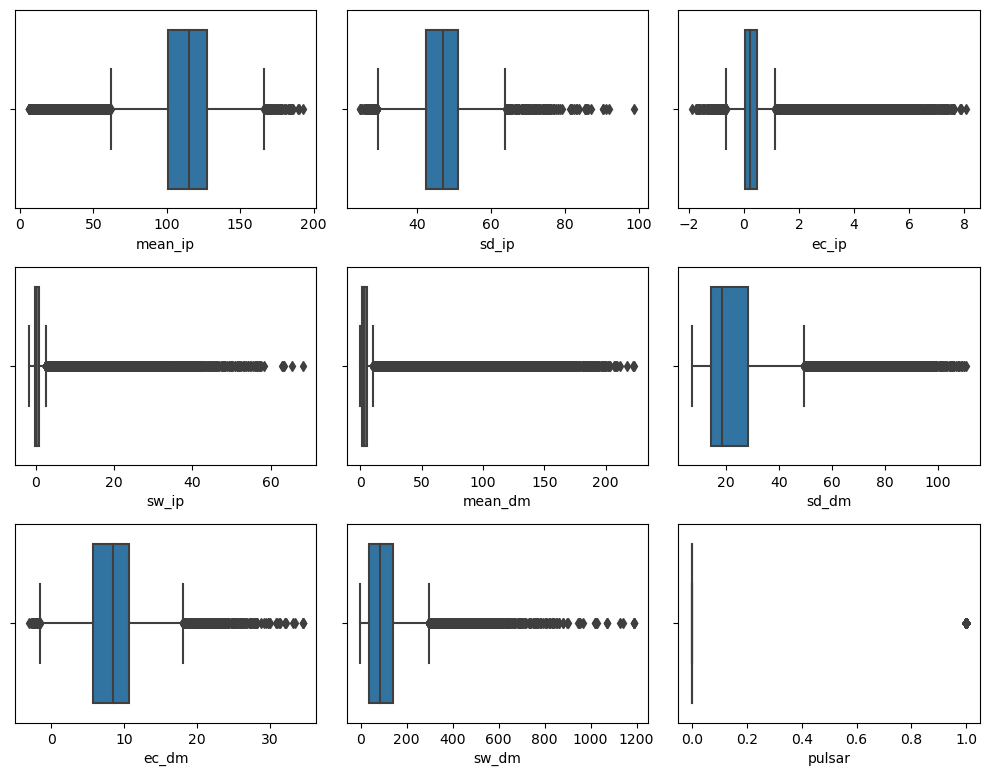

In [10]:

plt.figure(figsize=(10,10))
for i,j in enumerate(data.describe().columns):
  plt.subplot(4,3, i+1)
  sns.boxplot(x=data[j])
  plt.tight_layout()
plt.show()

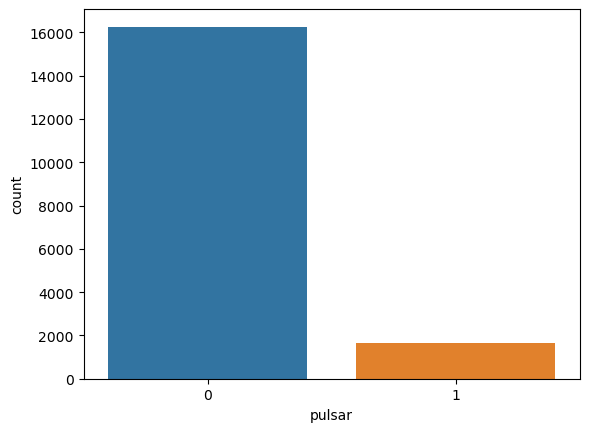

In [11]:
sns.countplot(x='pulsar',data=data)
plt.show()

In [12]:
X

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [13]:
## Us our data contains a lot of outliers let's use Robust scaler in order which scales features using 
##statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
scaled_data=RobustScaler().fit_transform(X)

# it's time to perform dimensionality reduction
* First of all we are going to determine the number of optimized components in order to keep as much variance as we can 

In [14]:

from sklearn.decomposition import PCA
#instantiate it
pca=PCA()
#Fit the data
pca.fit(scaled_data)

PCA()

**Cumulative explained variance** :  is a concept used in Principal Component Analysis (PCA) to understand how much of the total variance in the data is captured by each principal component (PC) and how the variance accumulates as you consider more components.

In [16]:
pca.explained_variance_ratio_

array([7.30785452e-01, 2.38719277e-01, 1.51748458e-02, 7.38940591e-03,
       3.63980789e-03, 3.43614619e-03, 7.19978767e-04, 1.35087079e-04])

In [17]:
cum_var = (np.cumsum(pca.explained_variance_ratio_))
print(cum_var)

[0.73078545 0.96950473 0.98467957 0.99206898 0.99570879 0.99914493
 0.99986491 1.        ]


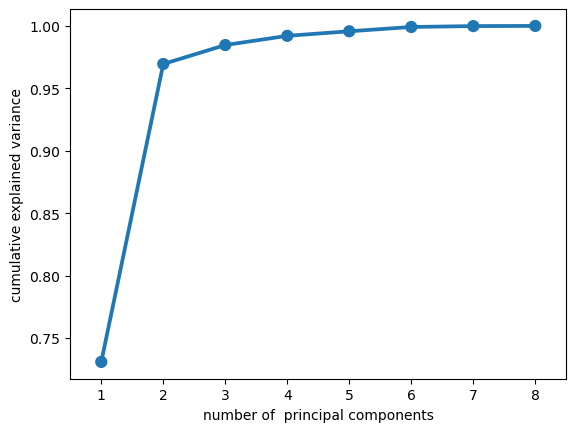

In [18]:
# Save cumulative explained variance
cum_var = (np.cumsum(pca.explained_variance_ratio_))
n_comp = [i for i in range(1, pca.n_components_ + 1)]

# Plot cumulative variance
ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  principal components', ylabel='cumulative explained variance')
plt.show()


with 3 components we have reached the original variance.

From the third component we can see the "elbow point" in the plot which is a point that indicate a reasonable number of components to select, as this is where adding more components does not contribute significantly to the cumulative explained variance.

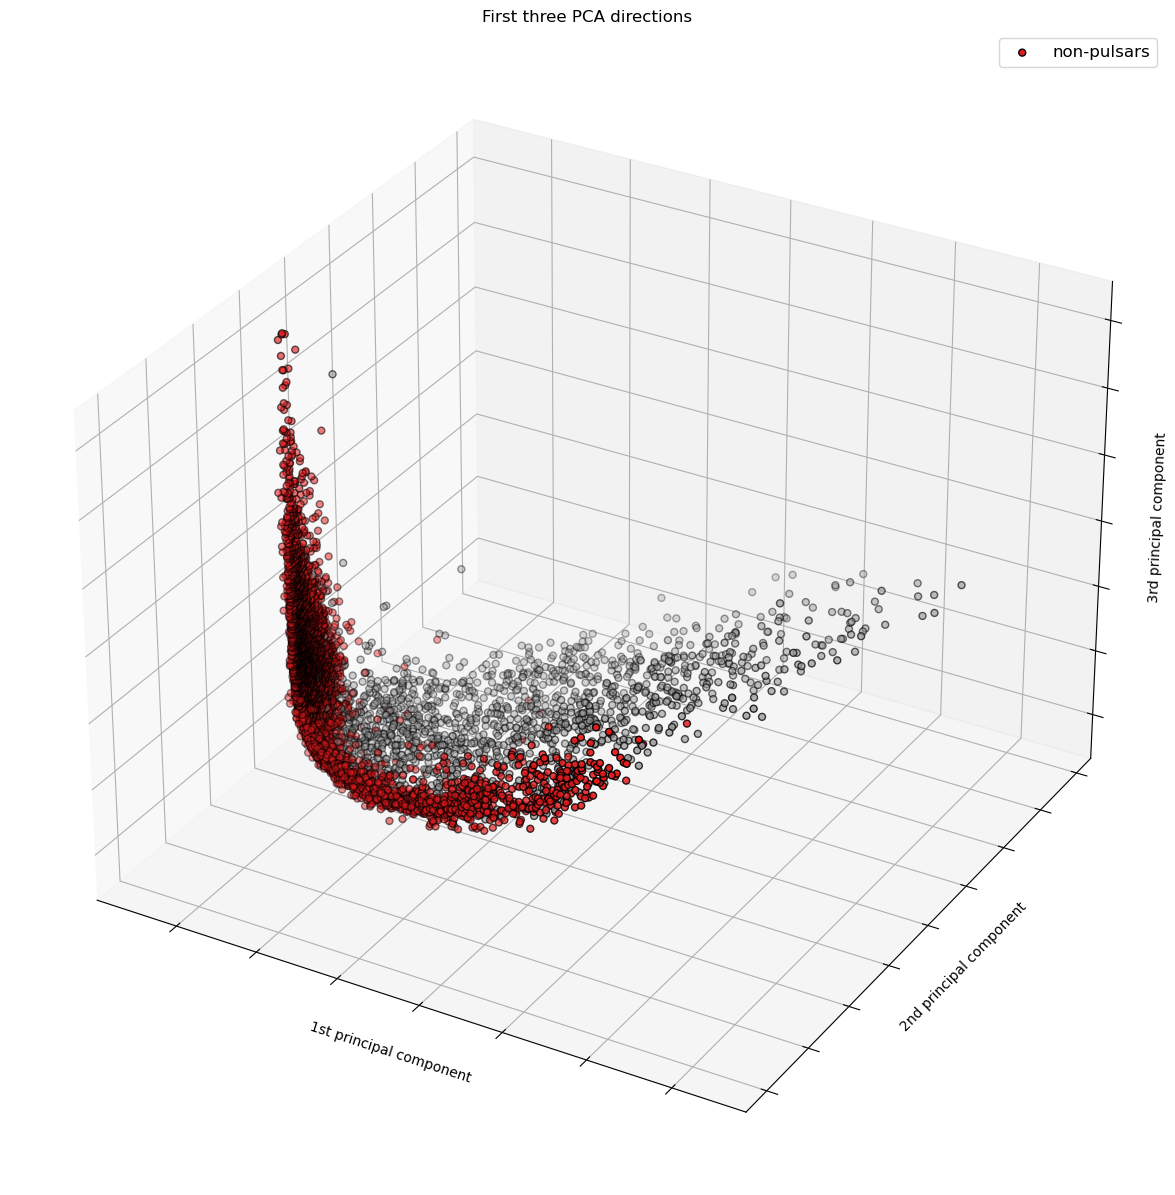

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Instantiate PCA with 3 components
pca_3 = PCA(3)

# Fit to scaled data
pca_3.fit(scaled_data)

# Transform scaled data
data_3pc = pca_3.transform(scaled_data)

# Render the 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data_3pc[:, 0], data_3pc[:, 1], data_3pc[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=25, label=data['pulsar'])

ax.legend(["non-pulsars"], fontsize="large")

ax.set_title("First three PCA directions")
ax.set_xlabel("1st principal component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd principal component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd principal component")
ax.w_zaxis.set_ticklabels([])

plt.show()

We can also note that from only 2 components we have reached more than 95% of the original variance 
soooo let's try with only 2 components

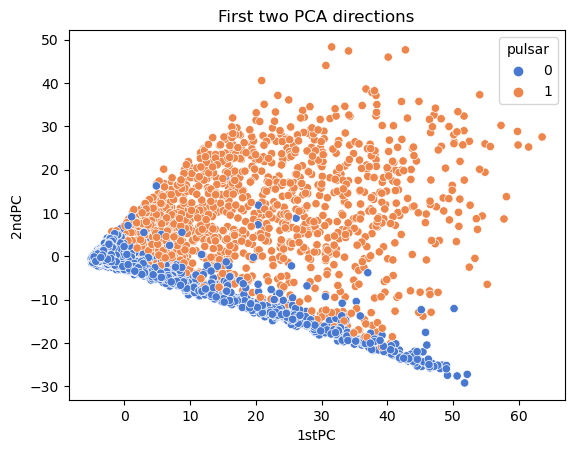

In [24]:
from mpl_toolkits.mplot3d import Axes3D

pca_2=PCA(2)
pca_2.fit(scaled_data)

data_2pc=pca_2.transform(scaled_data)


##plot now


ax = sns.scatterplot(x=data_2pc[:,0], 
                     y=data_2pc[:,1], 
                     hue=y,
                     palette=sns.color_palette("muted", n_colors=2))


ax.set(xlabel='1stPC', ylabel='2ndPC', title='First two PCA directions')
plt.show()


And yesss from 8 components to only 2 !!!!